In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: Jaunary 2014
# License: MIT

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Imputation of Missing Values

In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = [[np.nan, 5, np.nan], [2, 4, 10], [3, None, 5]]
imputer.fit_transform(X)

array([[ 2.5,  5. ,  7.5],
       [ 2. ,  4. , 10. ],
       [ 3. ,  4.5,  5. ]])

In [4]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
X = [[1, 2, np.nan], [3, 2, 3], [6, np.nan, 5], [7, 8, 10]]
imputer.fit_transform(X)

array([[ 1.,  2.,  4.],
       [ 3.,  2.,  3.],
       [ 6.,  5.,  5.],
       [ 7.,  8., 10.]])

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
X = [[1, 2], [2, 4], [4, 8], [np.nan, 3], [5, np.nan]]
imputer.fit_transform(X)

array([[ 1.        ,  2.        ],
       [ 2.        ,  4.        ],
       [ 4.        ,  8.        ],
       [ 1.50000846,  3.        ],
       [ 5.        , 10.00000145]])

Encoding Categorical Data

In [6]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
encoder.fit_transform(X)

array([[1., 0.],
       [0., 1.],
       [2., 0.]])

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
encoder.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

Outlier Detection

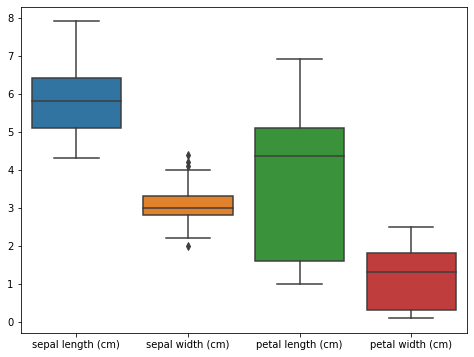

In [8]:
import seaborn as sns
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)
plt.figure(figsize=(8, 6))
sns.boxplot(data=X)

plt.savefig('figures/iris_boxplot.pdf', bbox_inches='tight')

Power Transformation

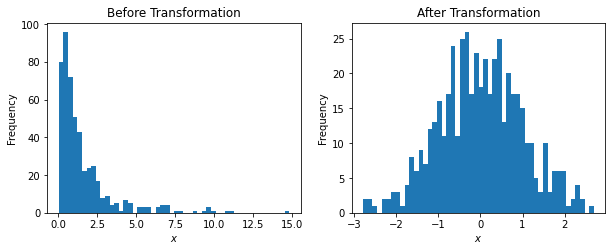

In [9]:
from sklearn.preprocessing import PowerTransformer

# Sample points from a log-normal distribution
x = np.random.RandomState(0).lognormal(size=500)

# Apply a Box-Cox transformation 
pt = PowerTransformer('box-cox')
x_new = pt.fit_transform(x.reshape(-1, 1))

# Plot histograms before and after the transformation
plt.figure(figsize=(10, 3.5))
plt.subplot(121)
plt.hist(x, bins=50)
plt.title('Before Transformation')
plt.xlabel('$x$')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(x_new, bins=50)
plt.title('After Transformation')
plt.xlabel('$x$')
plt.ylabel('Frequency')

plt.savefig('figures/power_transform.pdf', bbox_inches='tight')

Discretization

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, strategy='uniform', encode='ordinal')
X = [[-0.2, 2.0, -1], 
     [-0.1, 2.5, -0.5], 
     [0.1, 2.8, 0], 
     [0.2, 3.0, 2]]
discretizer.fit_transform(X)

array([[0., 0., 0.],
       [0., 1., 0.],
       [2., 2., 1.],
       [2., 2., 2.]])

In [11]:
print(discretizer.bin_edges_)

[array([-0.2       , -0.06666667,  0.06666667,  0.2       ])
 array([2.        , 2.33333333, 2.66666667, 3.        ])
 array([-1.,  0.,  1.,  2.])]


Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = [[1, -1, 2], 
     [2, 0, 0], 
     [0, 1, -1]]
scaler.fit_transform(X)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = [[1, -1, 2], 
     [2, 0, 0], 
     [0, 1, -1]]
scaler.fit_transform(X)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = [[1, -1, 2], 
     [2, 0, 0], 
     [0, 1, -1]]
scaler.fit_transform(X)

array([[ 0.        , -1.        ,  1.33333333],
       [ 1.        ,  0.        ,  0.        ],
       [-1.        ,  1.        , -0.66666667]])